# GO down BP ALL

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
# Python functions to read .CSV files into a Pandas DataFrame when the data of interest is before / after one or more empty/blank lines.
import csv
def csv_after_emptylines(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame, but only after at least one blank line has been skipped.
    bl_group_n is the expected number of distinct blocks of blank lines (of any number of rows each) to skip before reading data.
    NB: E.g. pd.read_csv(filepath, skiprows=[0, 1, 2]) works if you know the number of rows to be skipped. Use this function if you have a variable / unknown number of filled rows (to be skipped / ignored) before the empty rows.
    """
    with open(filepath, newline='') as f:
        contents = []
        headers = None
        r = csv.reader(f, delimiter='\t')
        return_df = pd.DataFrame()
        cluster_flag = True
        header_flag = False
        for i, l in enumerate(r):
            if not l:
                df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
                df['cluster'] = name[0].split(" ")[-1]
                df['enrichment_score'] = float(name[1].split(" ")[-1])
                return_df = pd.concat([return_df, df])
                contents = []
                cluster_flag = True
            else :
                if cluster_flag :
                    name = l
                    cluster_flag = False
                    header_flag = True
                elif header_flag :
                    headers = l
                    header_flag = False
                else :    
                    contents.append(l)
                
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(" ")[-1]
        df['enrichment_score'] = float(name[1].split(" ")[-1])
        return_df = pd.concat([return_df, df])        
        
        return return_df


def csv_until_emptyline(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame until a blank line is found, then stop.
    """
    with open(filepath, newline='') as f:
        contents = []
        r = csv.reader(f, delimiter='\t')
        name = next(r, None)
        for i, l in enumerate(r):
            if not l:
                break
            if i == 0:
                headers = l
                continue
            contents.append(l)
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(' ')[-1]
        df['enrichment_score'] = float(name[1].split(' ')[-1])
        return df

In [4]:
# david_go_dict = {}
# for gene in ['npm2a', 'mcm3l', 'mcm6l', 'orc1'] :
#     df = csv_after_emptylines(f'{gene}_down_1k.trans_clean.BP_ALL.txt')
#     df['GO Term'] = df['Term'].str.split('~', expand = True)[1]
#     df['-log10(p-value)'] = -np.log10(df['PValue'].astype('float'))
#     david_go_dict[gene] = df.loc[df['PValue'].astype('float') <= 0.05]

In [39]:
david_go_dict = {}
for stage in [ 'oocyte', '64', '1k', 'oblong'] :
    os.chdir(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/down_{stage}/DAVID')  
    df = csv_after_emptylines(f'npm2a_down_{stage}.trans_clean.BP_ALL.txt')
    df['GO Term'] = df['Term'].str.split('~', expand = True)[1]
    df['-log10(p-value)'] = -np.log10(df['PValue'].astype('float'))
    david_go_dict[stage] = df.loc[df['PValue'].astype('float') <= 0.05]

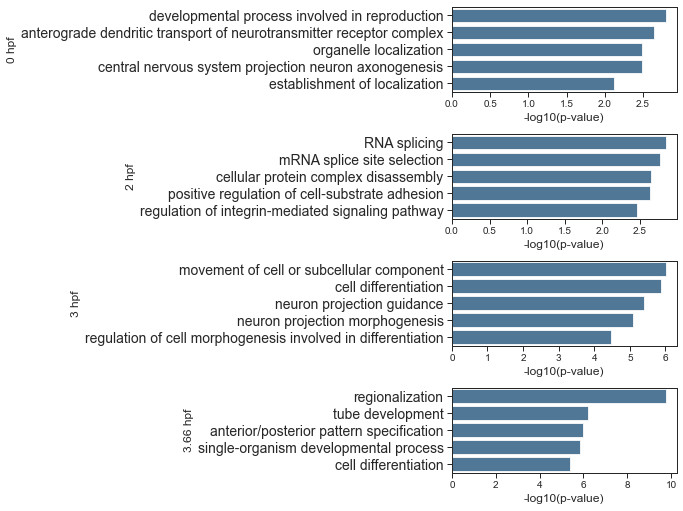

In [40]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 14,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(4,1,figsize = (6.4 * 1.5, 4.8 * 1.5), #gridspec_kw={'height_ratios': [2,2,2,2]},
                             tight_layout= True, sharex=False)
    title_ls = ['0 hpf', '2 hpf', '3 hpf', '3.66 hpf']
    for i,stage in enumerate(['oocyte', '64', '1k', 'oblong']) :
        ax = axes[i]
        df = david_go_dict[stage].sort_values(['-log10(p-value)'], ascending = False).groupby(['cluster']).head(1)
        head_num = 5
        if len(df.head(head_num)['GO Term'].unique()) < head_num :
            head_num = head_num + head_num - len(df.head(head_num)['GO Term'].unique())
        if df.empty :
            break
        sns.barplot(
            data = df.head(head_num),
            y = 'GO Term',
            x = '-log10(p-value)',
            ax = ax,
            color = '#4578A0',
#             palette = 'Set1'
        )
#         ax.set_title(f'Targets of universal CHMs inside {compart} compartment', ha = 'right')
        ax.set_ylabel(f'{title_ls[i]}')

    fig.savefig(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make6_bar_GO_downTrans_BP_ALL.pdf', 
        transparent = True)    